#**Analisis exploratorio de datos**
##Clasificar géneros de canciones


#**Objetivo**

**Objetivo Principal del Proyecto**:
Dado un conjunto de datos sobre características de canciones, **¿es posible clasificar una canción como 'Hip-Hop' o 'Rock' sin escucharla?**

# **Importing libraries and data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Importing Libraries

import pandas as pd

1. Carga de datos

In [4]:
data_csv = pd.read_csv('/content/drive/MyDrive/IA1_2023-2_Proyecto Final-Primera_Entrega/ClassifyMusicGenres/data/fma-rock-vs-hiphop.csv')
data_json = pd.read_json('/content/drive/MyDrive/IA1_2023-2_Proyecto Final-Primera_Entrega/ClassifyMusicGenres/data/echonest-metrics.json')

2. Inspección inicial de los datos

Para entender la estructura de los datos, es útil ver las primeras filas:

In [5]:
data_csv.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [6]:
data_json.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


3. Información general sobre los datasets

Para obtener información sobre el número de registros, tipos de datos, y valores nulos:

In [7]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [8]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


4. Estadísticas descriptivas

Esto proporciona estadísticas resumidas para las columnas numéricas:

In [9]:
data_csv.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [10]:
data_json.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


Se observa que la variable `track_id` ambas tablas las tienen en comun, por lo que unimos las tablas para seguir analizando una tabla

In [11]:
merged_data = pd.merge(data_csv, data_json, on='track_id', how='inner')

Utilizamos parámetro how='inner' el cual significa que solo se necesitan las filas donde track_id exista en ambos dataframes.

Con base a lo anterior, seguiremos con el analisis con la tabla merged_data

# **Revisión de merged data**

Vemos las columnas que quedaron las cuales fueron 29 columnas

In [12]:
print("Columnas en merged_data:", merged_data.columns)

Columnas en merged_data: Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')


1. Vista inicial de los datos

In [13]:
merged_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,tags,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,[],Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,[],Squares And Circles,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,[],Maps of the Stars Homes,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],...,[],Boss of Goth,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],...,[],Industry Standard Massacre,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


2. Información general sobre el dataset

In [14]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


In [28]:
print(merged_data[['genre_top', 'genres', 'genres_all']].tail())

     genre_top genres genres_all
4797   Hip-Hop   [21]       [21]
4798   Hip-Hop   [21]       [21]
4799   Hip-Hop   [21]       [21]
4800   Hip-Hop   [21]       [21]
4801   Hip-Hop   [21]       [21]


3. Estadísticas descriptivas

In [16]:
merged_data.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,246125.992503,0.027697,229.256768,2.008746,1.913525e+03,1091.146189,5.757185,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,56789.007268,0.418614,190.619206,9.671264,1.631005e+04,7490.835102,5.661765,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,-1.000000,0.000000,18.000000,0.000000,6.300000e+01,12.000000,0.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,197678.750000,0.000000,144.000000,0.000000,4.310000e+02,194.250000,2.000000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,256000.000000,0.000000,198.000000,1.000000,8.355000e+02,395.000000,5.000000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,256000.000000,0.000000,261.000000,2.000000,1.579000e+03,867.750000,8.000000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,448000.000000,24.000000,3033.000000,554.000000,1.038669e+06,433992.000000,100.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


4. Chequeo de valores nulos

In [17]:
merged_data.isnull().sum()

track_id               0
bit_rate               0
comments               0
composer            4696
date_created           0
date_recorded       3568
duration               0
favorites              0
genre_top              0
genres                 0
genres_all             0
information         4468
interest               0
language_code       2203
license               13
listens                0
lyricist            4789
number                 0
publisher           4775
tags                   0
title                  0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

## Análisis de Valores Faltantes

### **Sin Valores Faltantes**:
- **track_id, bit_rate, comments, date_created, duration, favorites, genre_top, genres, genres_all, interest, listens, number, tags, title, acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo y valence**:
    - Estas columnas **no tienen ningún valor faltante** y están completamente llenas.

### **Con Valores Faltantes Significativos**:

1. **composer**:
    - 4696 valores faltantes de 4802 (aproximadamente el 97.8% de los datos están faltantes).
    - **Recomendación**: Debido a la gran cantidad de valores faltantes, esta columna podría no ser útil para el análisis y la clasificación.

2. **date_recorded**:
    - 3568 valores faltantes de 4802 (aproximadamente el 74.3%).
    - **Recomendación**: Esta columna podría omitirse a menos que se considere que la fecha de grabación podría tener una influencia significativa en el género de la canción.

3. **information**:
    - 4468 valores faltantes de 4802 (aproximadamente el 93.0%).
    - **Recomendación**: Probablemente no sea útil debido a la falta de datos.

4. **language_code**:
    - 2203 valores faltantes de 4802 (aproximadamente el 45.9%).
    - **Recomendación**: Esta columna podría ser útil si ciertos géneros tienden a estar en ciertos idiomas. Pero debe tratarse con cuidado debido a la cantidad de valores faltantes.

5. **license**:
    - 13 valores faltantes de 4802 (menos del 0.3%).
    - **Recomendación**: Los valores faltantes podrían ser llenados o eliminados, pero se necesita entender mejor si la licencia tiene relevancia en la clasificación del género.

6. **lyricist**:
    - 4789 valores faltantes de 4802 (aproximadamente el 99.7%).
    - **Recomendación**: Debido al alto porcentaje de valores faltantes, es probable que no sea útil.

7. **publisher**:
    - 4775 valores faltantes de 4802 (aproximadamente el 99.4%).
    - **Recomendación**: Al igual que 'lyricist', es probable que no sea útil.


# **Revisión de cada columna**

### 1. `track_id`

Columna: track_id

Esta columna es un identificador único. Por lo tanto, simplemente querríamos verificar si hay duplicados.

In [18]:
print("Número de ID de pista únicos:", merged_data['track_id'].nunique())
print("Número total de filas:", len(merged_data))

Número de ID de pista únicos: 4802
Número total de filas: 4802


### 2. `bit_rate`

In [19]:
merged_data['bit_rate'].describe()

count      4802.000000
mean     246125.992503
std       56789.007268
min          -1.000000
25%      197678.750000
50%      256000.000000
75%      256000.000000
max      448000.000000
Name: bit_rate, dtype: float64

La columna `bit_rate` indica la tasa de bits de las canciones en el conjunto de datos. La tasa de bits se refiere a la cantidad de bits que se transmiten o procesan por unidad de tiempo en un archivo de audio y se mide típicamente en kilobits por segundo (kbps). Una tasa de bits más alta usualmente indica una mejor calidad de audio.

- **Total de canciones**: 4802
- **Tasa de bits promedio**: 246126 kbps
    - Esto sugiere que la calidad del audio es relativamente alta, dado que muchas canciones en formato MP3 varían entre 128 kbps y 320 kbps.
- **Desviación estándar**: 56789 kbps
    - Una desviación estándar mayor indica una variabilidad más alta en las tasas de bits de las canciones.
- **Valor mínimo**: -1 kbps
    - Este valor es inusual, ya que una tasa de bits no puede ser negativa. Podría indicar un valor marcador para entradas faltantes o un error.
- **Percentil 25%**: 197679 kbps
- **Mediana (Percentil 50%)**: 256000 kbps
- **Percentil 75%**: 256000 kbps
- **Valor máximo**: 448000 kbps
    - Una tasa de bits muy alta, indicando una calidad de audio posiblemente excepcional.

**Conclusión**: La mayoría de las canciones en el dataset tienen una calidad de audio alta según su tasa de bits. Sin embargo, hay que tener en cuenta y corregir posibles errores o valores atípicos, como el valor de -1 kbps.


#### Nota sobre la Relevancia de la columna `bit_rate`

Aunque la columna `bit_rate` nos informa sobre la calidad del audio de una canción, es importante considerar su relevancia en relación con el objetivo principal de este análisis.

### ¿Por qué `bit_rate` podría no ser relevante para nuestro objetivo?

1. **Irrelevancia de la Calidad del Audio para el Género**: La calidad del audio (tasa de bits) no es un indicador directo del género musical. Canciones de Rock pueden tener la misma tasa de bits que canciones de Hip-Hop.

2. **Datos Dispersiones**: Si bien hay valores inusuales como -1 kbps que podrían requerir limpieza, esta corrección no contribuiría directamente al objetivo de clasificación del género.

3. **Más Importancia de Otras Características**: Hay otras características en el conjunto de datos que son más relevantes cuando se trata de identificar características específicas del género musical.

**Conclusión**: Aunque la columna `bit_rate` proporciona información valiosa, probablemente no será crucial para clasificar canciones como 'Hip-Hop' o 'Rock'. Al entrenar modelos de aprendizaje automático, es posible que decidamos omitir esta columna o darle un peso menor en la construcción del modelo.


### 3. `comments`

In [20]:
merged_data['comments'].describe()

count    4802.000000
mean        0.027697
std         0.418614
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.000000
Name: comments, dtype: float64

 `comments`:

Refleja el número de comentarios que ha recibido una canción en particular. Es una métrica que puede indicar la popularidad o la controversia de una canción, aunque no necesariamente su género.

- **Resumen Estadístico de `comments`**:
  - **Count**: Hay 4802 registros en esta columna, lo que indica que no hay valores faltantes.
  - **Media**: En promedio, las canciones han recibido aproximadamente 0.027 comentarios.
  - **Desviación estándar**: 0.418, lo que indica una baja variabilidad en el número de comentarios recibidos por canción.
  - **Min/Max**: La canción con menos comentarios tiene 0 comentarios, mientras que la canción con más comentarios ha recibido 24.
  - **Mediana (50% percentile)**: La mayoría de las canciones (al menos el 75% de ellas) no tienen comentarios, ya que tanto el percentil 25% como el 50% y el 75% tienen un valor de 0.

**Observaciones**:
Dada la baja media y la predominancia de ceros en esta columna, se puede deducir que la mayoría de las canciones en este conjunto de datos no tienen comentarios. Sin embargo, hay algunas canciones que han llamado la atención y han recibido hasta 24 comentarios.

**Relevancia para el objetivo**:
La cantidad de comentarios puede reflejar la popularidad o el interés en una canción, pero no proporciona una indicación directa sobre su género. Por lo tanto, aunque es una columna interesante, podría no ser crucial para clasificar las canciones como 'Hip-Hop' o 'Rock'.

### 4. `composer`

### 5. `date_created`

### 6. `date_recorded`

### 7. `duration`

### 8. `favorites`

### 9. `genre_top`

In [21]:
merged_data['genre_top'].value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

### 10. `genres`

### 11. `genres_all`

### 12. `information`

### 13. `interest`

### 14. `language_code`

### 15. `license`

### 16. `listens`

### 17. `lyricist`

### 18. `number`

### 19. `publisher`

#**Evaluación de la columnas para el objetivo**


### 1. `track_id`:
Identificador único asignado a cada pista o canción en el conjunto de datos. Este ID permite una referencia rápida y unívoca a cada entrada individual sin confusión con otras canciones.

### 2. `bit_rate`:
Indica la tasa de bits de las canciones, que se refiere a la cantidad de bits que se transmiten o procesan por unidad de tiempo en un archivo de audio. Generalmente, una tasa de bits más alta significa una mejor calidad de audio. Se mide en kilobits por segundo (kbps).

### 3. `comments`:

Refleja el número de comentarios que ha recibido una canción en particular. Es una métrica que puede indicar la popularidad o la controversia de una canción, aunque no necesariamente su género.

### 4. `composer`:

## Descripción general de las Columnas

1. **track_id**:
    - Identificador único para cada canción o pista.
    
2. **bit_rate**:
    - Tasa de bits de la canción, indicando la calidad del archivo de audio.
    
3. **comments**:
    - Número de comentarios que ha recibido la pista.
    
4. **composer**:
    - La persona o entidad que compuso la música.
    
5. **date_created**:
    - Fecha en la que se creó o subió la pista.
    
6. **date_recorded**:
    - Fecha en la que se grabó la pista.
    
7. **duration**:
    - Duración de la pista en segundos.
    
8. **favorites**:
    - Número de veces que la pista ha sido marcada como favorita.
    
9. **genre_top**:
    - El género principal o dominante de la pista.
    
10. **genres**:
    - Una lista o conjunto de géneros asociados con la pista.
    
11. **genres_all**:
    - Una lista completa de todos los géneros asociados con la pista.
    
12. **information**:
    - Información adicional o notas sobre la pista.
    
13. **interest**:
    - Indicador de cuánto interés ha generado la pista.
    
14. **language_code**:
    - Código del idioma en el que se canta o se presenta la pista.
    
15. **license**:
    - Licencia bajo la cual se distribuye o se permite el uso de la pista.
    
16. **listens**:
    - Número de veces que se ha escuchado la pista.
    
17. **lyricist**:
    - La persona o entidad que escribió la letra de la canción.
    
18. **number**:
    - Puede ser el número de pista en un álbum o colección.
    
19. **publisher**:
    - Entidad que publicó la pista.
    
20. **tags**:
    - Etiquetas o palabras clave asociadas con la pista.
    
21. **title**:
    - Título de la pista.
    
22. **acousticness**:
    - Medida de cuánto de la pista es acústica.
    
23. **danceability**:
    - Medida de cuán bailable es una pista.
    
24. **energy**:
    - Medida de la intensidad y actividad de la pista.
    
25. **instrumentalness**:
    - Medida de si una pista no tiene vocales.
    
26. **liveness**:
    - Medida de la presencia de audiencia en la grabación.
    
27. **speechiness**:
    - Medida de la cantidad de palabras habladas en la pista.
    
28. **tempo**:
    - El tempo o velocidad de la pista, medido en BPM.
    
29. **valence**:
    - Medida del positivismo transmitido por la pista.



# Columnas relevantes

---

### Columnas Relevantes para el Análisis

A continuación, se enlistan las columnas que se consideran relevantes para nuestro objetivo de clasificar una canción como 'Hip-Hop' o 'Rock' basándonos en sus características intrínsecas:

1. **duration**: Representa la duración de la pista. La duración podría tener patrones específicos para ciertos géneros.
2. **genre_top**: Esta es nuestra variable objetivo. Indica el género principal de la canción.
3. **acousticness**: Mide cuán acústica es una pista. Algunos géneros pueden tener una tendencia a ser más acústicos que otros.
4. **danceability**: Indica qué tan adecuada es una pista para bailar. Los géneros tienen distintas características rítmicas.
5. **energy**: Refleja la energía de una pista. Puede ayudar a distinguir entre géneros más enérgicos y otros más suaves.
6. **instrumentalness**: Determina qué tan instrumental es una canción. Algunos géneros podrían tener más instrumentales que otros.
7. **liveness**: Detecta la presencia de público en la grabación de la pista. Puede diferenciar entre grabaciones en vivo y de estudio.
8. **speechiness**: Indica la presencia de palabras habladas en una pista. Es crucial para géneros como el hip-hop.
9. **tempo**: Refiere al tempo de la pista. Diferentes géneros pueden tener tempos característicos.
10. **valence**: Mide cuán positiva es la música. Puede ayudar a diferenciar el tono emocional entre géneros.

### Razón para Descartar Otras Columnas

Se optó por descartar diversas columnas debido a varias razones:

- **Identificadores y metadatos** como `track_id`, `composer`, `date_created`, `date_recorded`, `lyricist`, `publisher`, `tags`, y `title` no ofrecen información relevante acerca del género musical intrínseco.
  
- **Indicadores de popularidad** como `comments`, `favorites`, `interest`, y `listens` reflejan la recepción del público pero no la esencia del género.

- **Licencia y calidad técnica** representados en `license` y `bit_rate` no están relacionados directamente con las características sonoras del género.

- Se evita la posibilidad de **fugas de datos** al descartar `genres` y `genres_all` dado que ya se tiene `genre_top` como variable objetivo.

La idea principal es centrarse en las características que reflejen la naturaleza y esencia del género musical, más que en la popularidad, metadatos o aspectos técnicos.

---


# Limpieza de datos

In [22]:
# Importando las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Descartando columnas no deseadas
cols_to_drop = ['track_id', 'bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'favorites',
                'genres', 'genres_all', 'information', 'interest', 'language_code', 'license', 'listens',
                'lyricist', 'number', 'publisher', 'tags', 'title']
merged_data_clean = merged_data.drop(columns=cols_to_drop)



<ipython-input-24-88f08376a9c3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data_clean.corr(), cmap="coolwarm", annot=True)


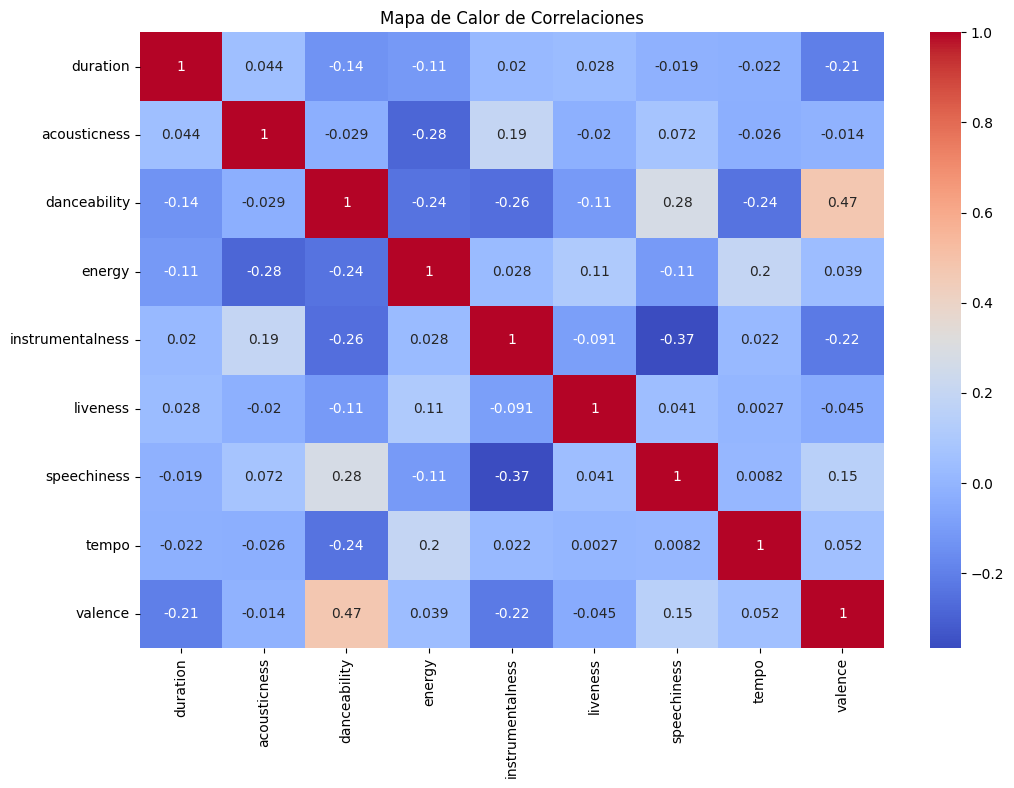

In [24]:
# Análisis exploratorio y visualización
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data_clean.corr(), cmap="coolwarm", annot=True)
plt.title("Mapa de Calor de Correlaciones")
plt.show()



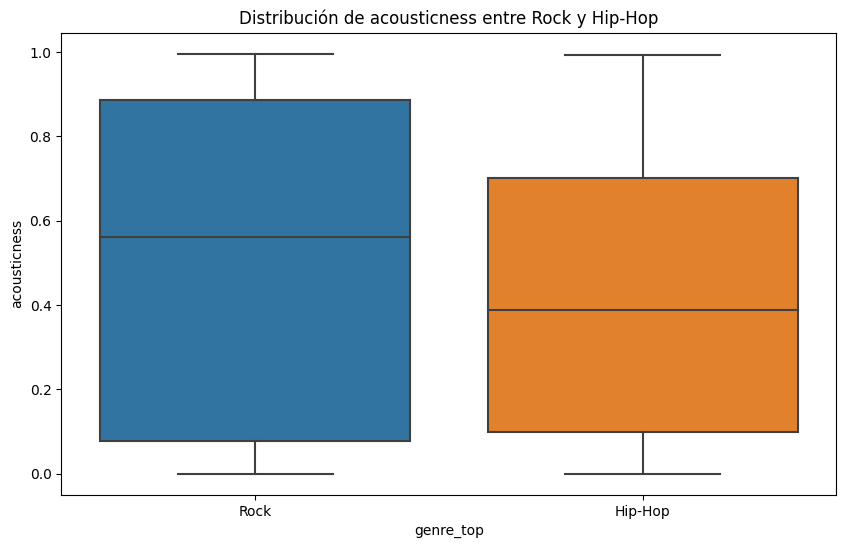

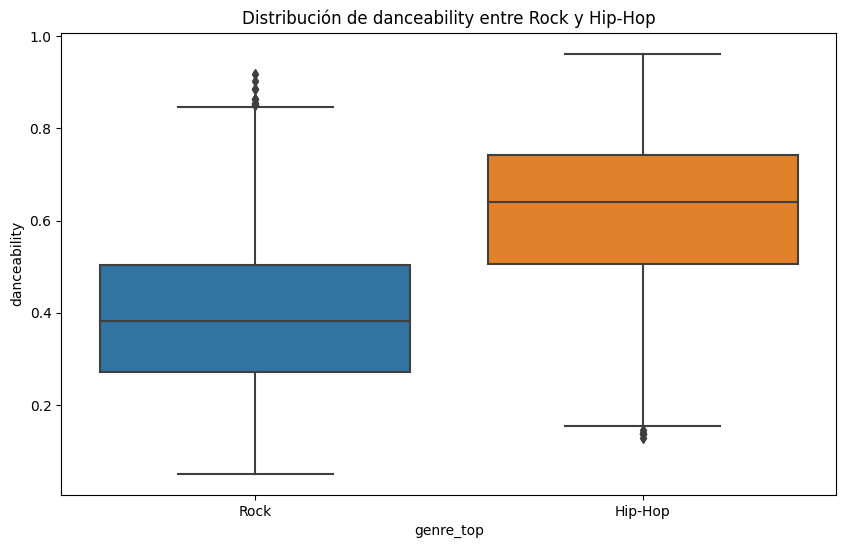

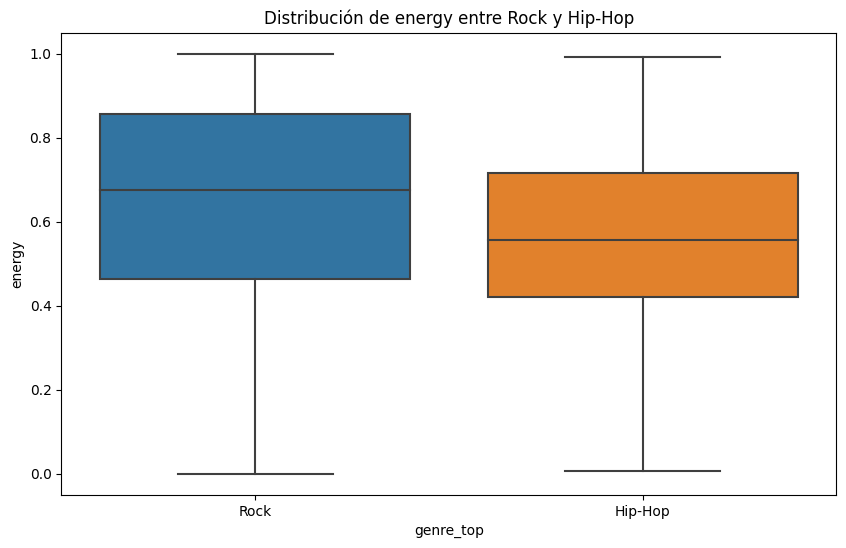

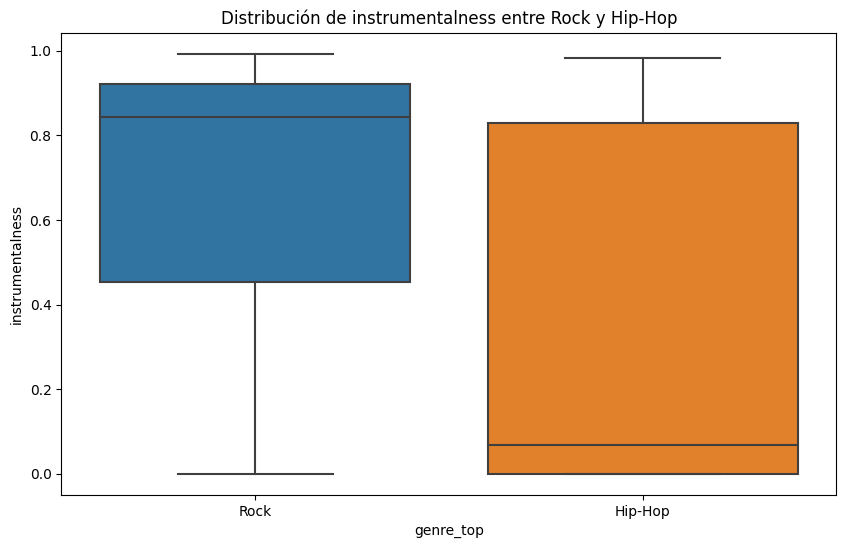

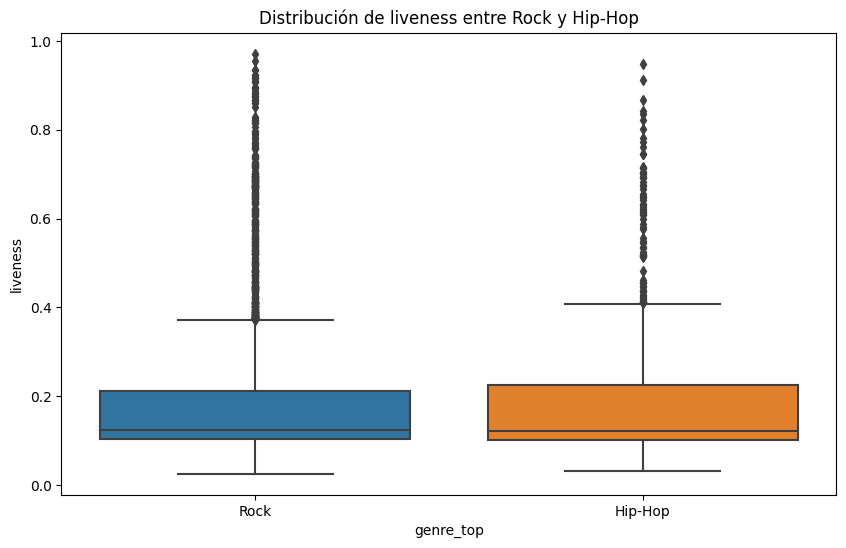

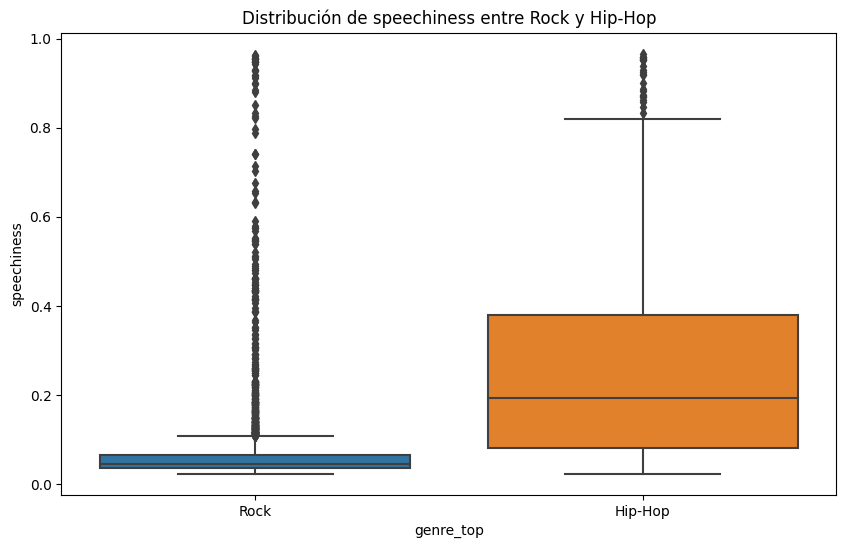

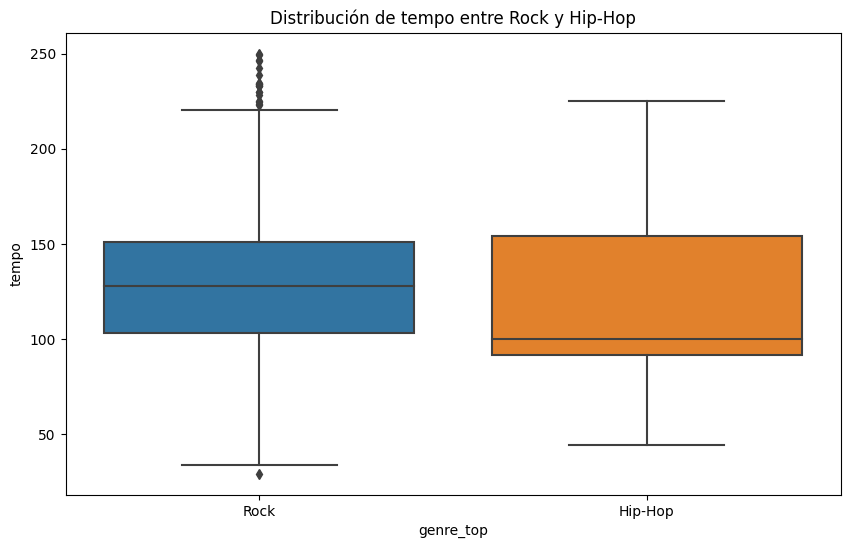

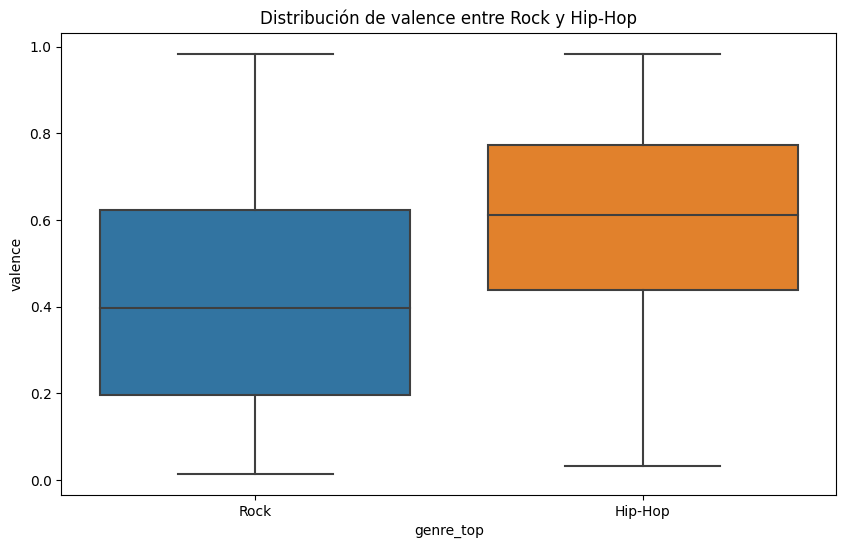

In [25]:
# Boxplots para comparar distribuciones de características entre Rock y Hip-Hop
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='genre_top', y=feature, data=merged_data_clean)
    plt.title(f"Distribución de {feature} entre Rock y Hip-Hop")
    plt.show()

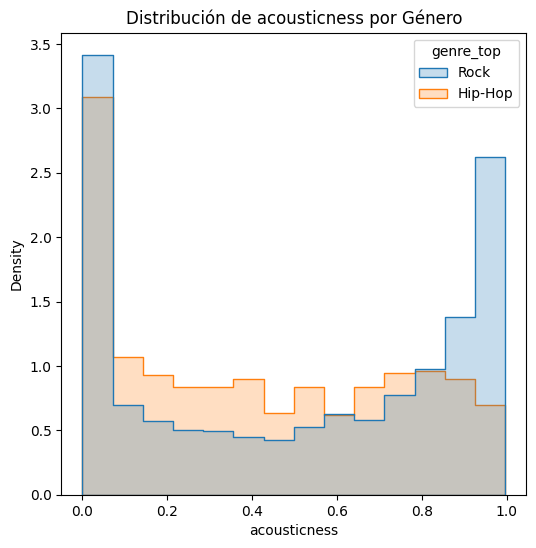

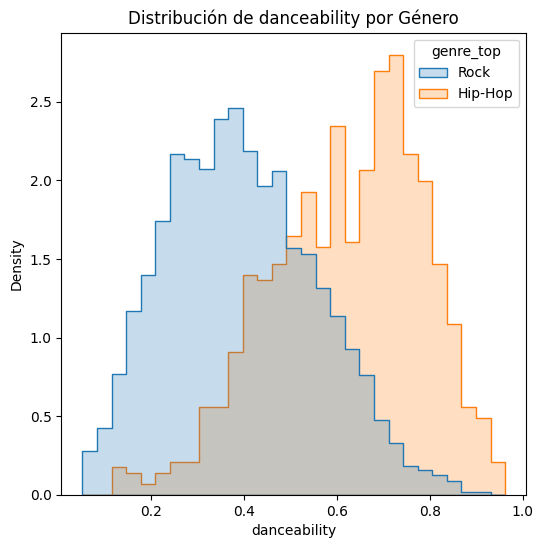

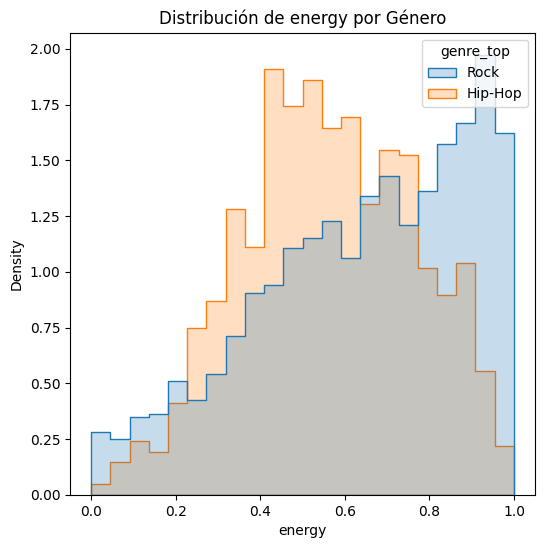

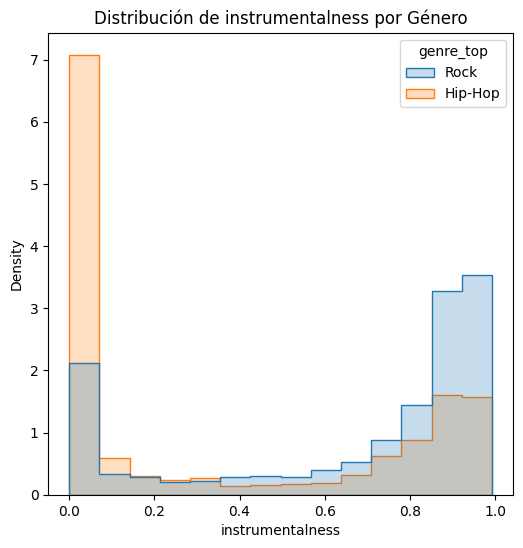

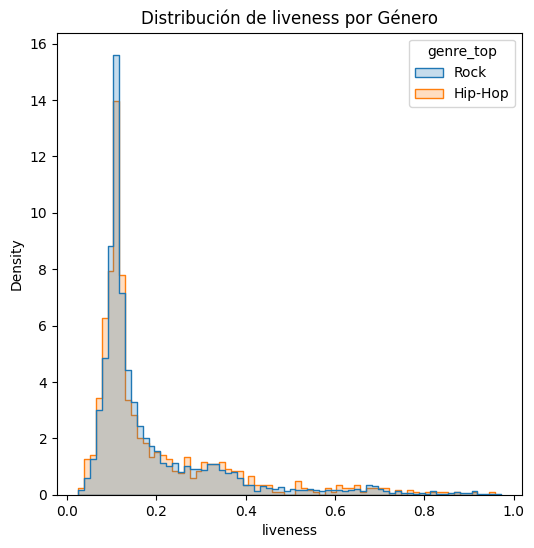

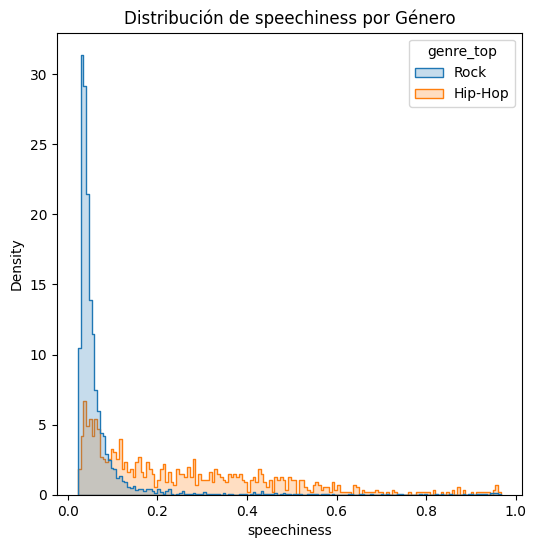

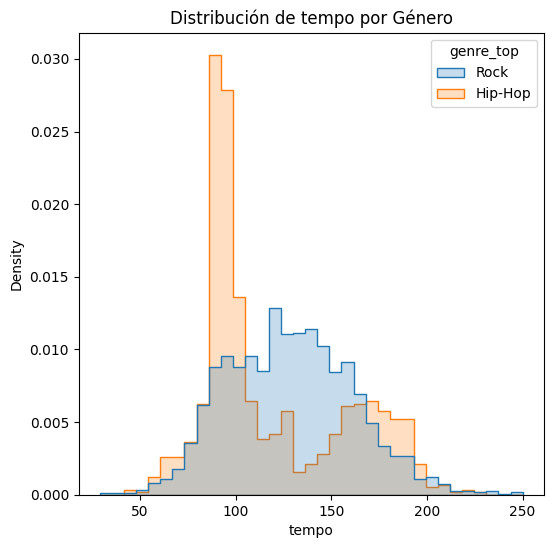

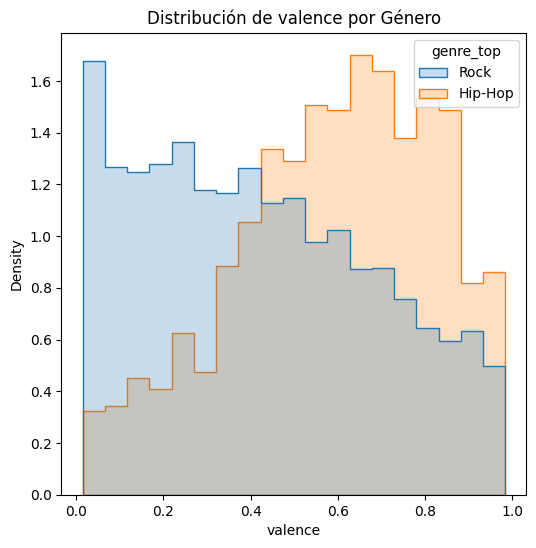

In [26]:
# Histogramas o KDE para cada característica por género
for feature in features:
    plt.figure(figsize=(6, 6))
    sns.histplot(merged_data_clean, x=feature, hue='genre_top', element="step", stat="density", common_norm=False)
    plt.title(f"Distribución de {feature} por Género")
    plt.show()





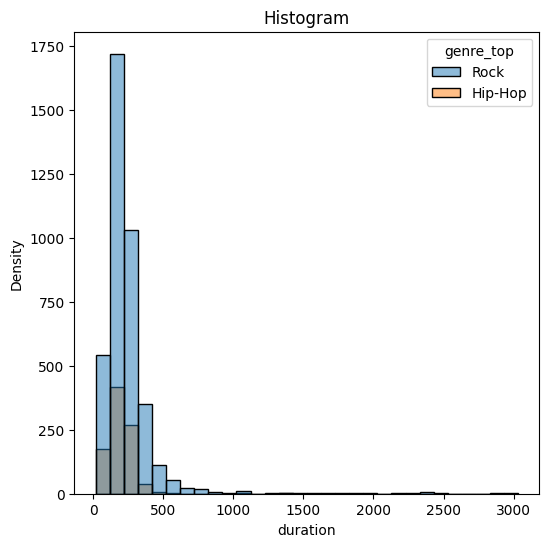

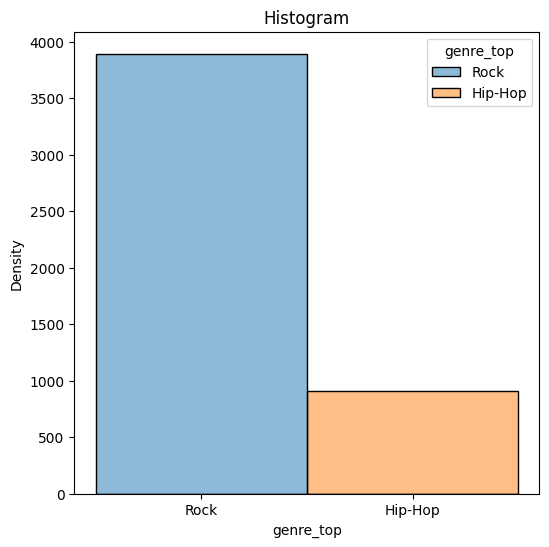

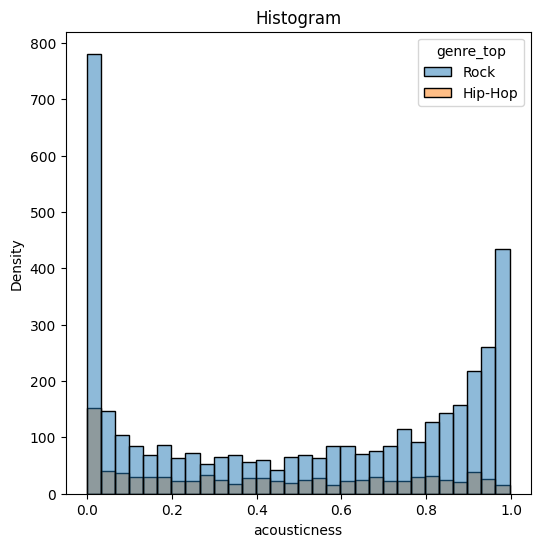

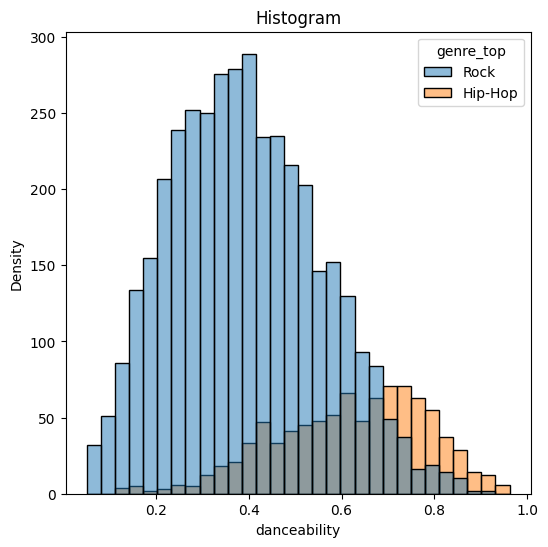

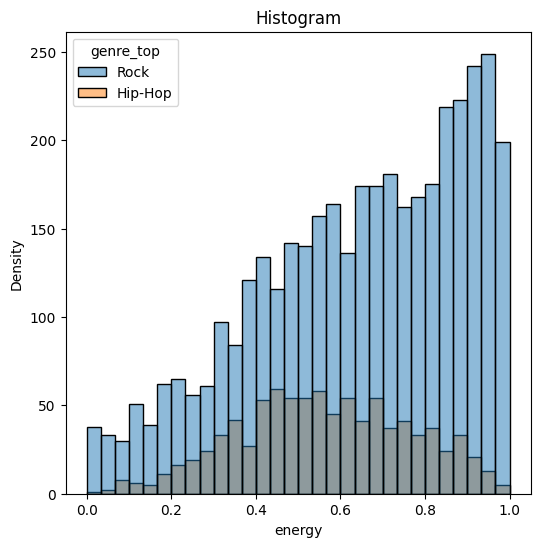

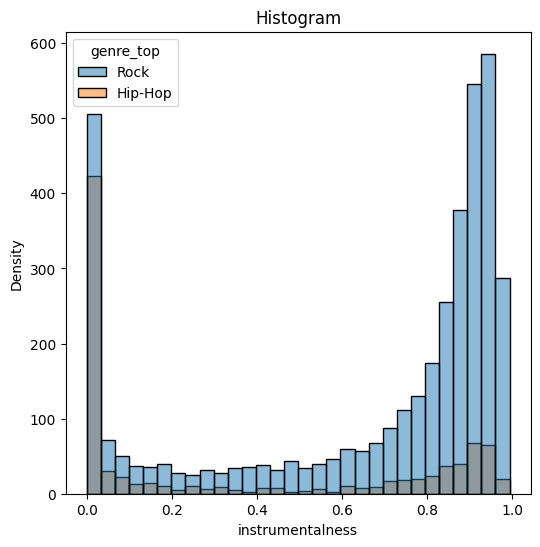

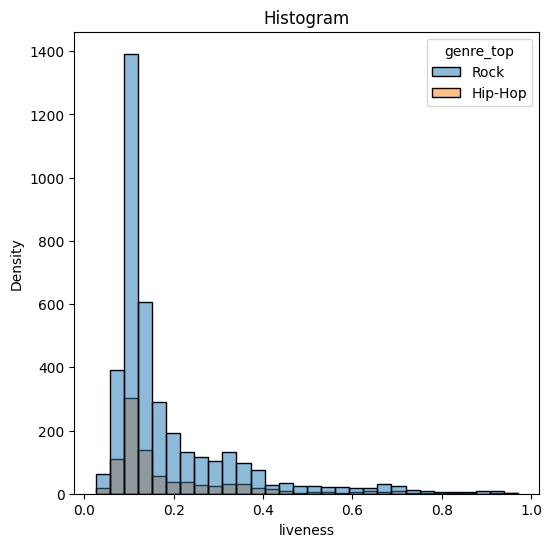

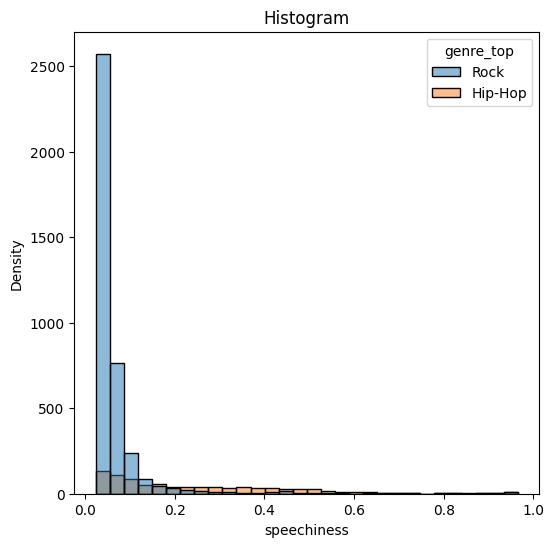

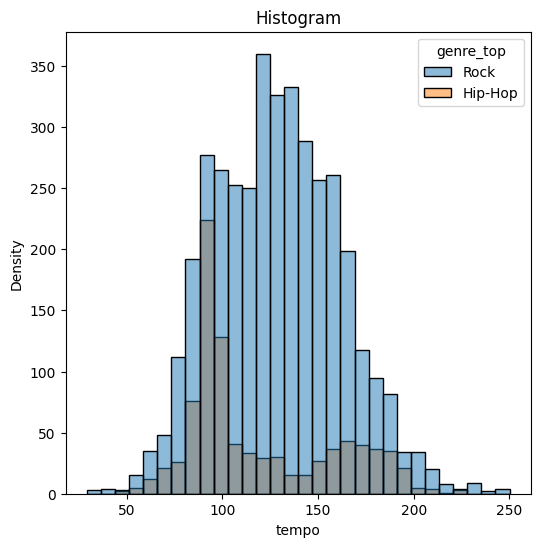

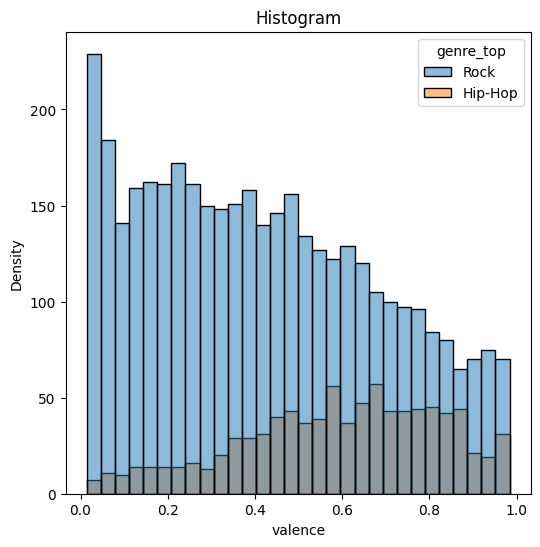

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in merged_data_clean.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=merged_data_clean,
                 x=column,
                 hue='genre_top',
                 bins=30,
                 color='red',
                 fill=True,
                 stat='count')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Histogram')
    plt.show()


In [ ]:
# Violin Plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='genre_top', y=feature, data=merged_data_clean)
    plt.title(f"Violin Plot de {feature} por Género")
    plt.show()

In [ ]:
# Pair Plot (Esto puede ser costoso computacionalmente con un gran número de características)
sns.pairplot(merged_data_clean, hue="genre_top")
plt.show()
